In [1]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from skimage import transform,data
import imageio
from collections import Counter

In [2]:
def get_files(file_dir):
    #正类
    Yes = []
    label_Yes = []
    #负类
    No = []
    label_No = []
    
    for file in os.listdir(file_dir+'/Yes'):
        Yes.append(file_dir+'/Yes'+'/'+file)
        label_Yes.append(1)
        
    for file in os.listdir(file_dir+'/No'):
        No.append(file_dir+'/No'+'/'+file)
        label_No.append(0)
        
    #合并数据集
    image_list=np.hstack((Yes,No))
    label_list=np.hstack((label_Yes,label_No))
    
    #打乱图片顺序
    temp=np.array([image_list,label_list])
    temp=temp.transpose()
    np.random.shuffle(temp)
    
    #取出
    image_list=list(temp[:,0])
    label_list=list(temp[:,1])
    label_list=[int(i) for i in label_list]
    
    return image_list,label_list

In [3]:
image_list,label_list=get_files("/home/yee/DataSet/Animal/")

In [4]:
print(len(image_list))

160


In [6]:
#568切分出来做测试集
Train_image=np.random.rand(len(image_list)-68,64,64,3).astype('float32')
Train_label=np.random.rand(len(image_list)-68,1).astype('float32')
Test_image=np.random.rand(568,64,64,3).astype('float32')
Test_label=np.random.rand(568,1).astype('float32')

In [7]:
print(len(Train_image))
print(len(Test_image))

92
568


In [8]:
sum=1
for i in range(len(image_list)-68):
    #print(i)
    temp_image= np.array(imageio.imread(image_list[i]))
    #print(temp_image.shape,temp_image.ndim)
    if  temp_image.ndim==3:
        if temp_image.shape[2]!=4:
            Train_image[i]=transform.resize(temp_image,(64,64))
            Train_label[i] = np.array(label_list[i])
            sum+=1
print("+++++++++++++++++++++++++++")
print(sum)
for i in range(len(image_list)-68, len(image_list)):
    #print(i)
    temp_image=np.array(imageio.imread(image_list[i+68-len(image_list)] ))
    #print(temp_image.shape)
    if temp_image.ndim==3:
        if temp_image.shape[2]!=4:
            Test_image[i+68-len(image_list)]=transform.resize(temp_image,(64,64))
            Test_label[i+68-len(image_list)] = np.array(label_list[i])
            sum+=1
print("+++++++++++++++++++++++++++")
print(sum)

+++++++++++++++++++++++++++
93
+++++++++++++++++++++++++++
161


In [9]:
f=h5py.File('Train_Set_cat_1.h5','w')
f.create_dataset('train_set_x',data=Train_image)
f.create_dataset('train_set_y',data=Train_label)

<HDF5 dataset "train_set_y": shape (92, 1), type "<f4">

In [10]:
f=h5py.File('Test_Set_cat_1.h5','w')
f.create_dataset('test_set_x',data=Test_image)
f.create_dataset('test_set_y',data=Test_label)

<HDF5 dataset "test_set_y": shape (568, 1), type "<f4">

(92, 64, 64, 3)
[1.]


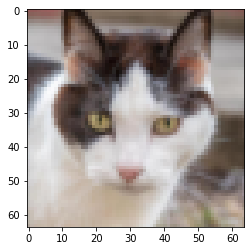

In [17]:
Train_dataset=h5py.File('Train_Set_cat_1.h5','r')
T_X=np.array(Train_dataset['train_set_x'][:])
T_y=np.array(Train_dataset['train_set_y'][:])
print(T_X.shape)
index=17
print(T_y[index])
plt.imshow(T_X[index])

(92, 64, 64, 3)
[1.]


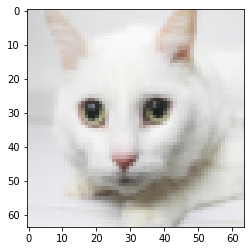

In [18]:
Train_dataset=h5py.File('Train_Set_cat_1.h5','r')
T_X=np.array(Train_dataset['train_set_x'][:])
T_y=np.array(Train_dataset['train_set_y'][:])
print(T_X.shape)
index=10
print(T_y[index])
plt.imshow(T_X[index])

In [32]:
temp_image= np.array(imageio.imread("/home/yee/DataSet/1.jpg"))
image=transform.resize(temp_image,(64,64))

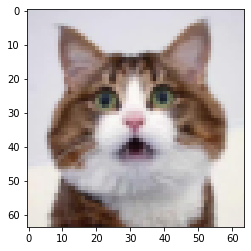

In [7]:
plt.imshow(image)

In [33]:
red=image.copy()
green=image.copy()
blue=image.copy()
red[:,:,1:3]=0
green[:,:,::2]=0
blue[:,:,:2]=0

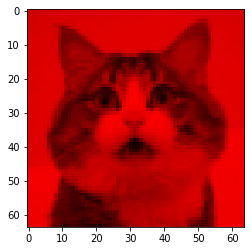

In [34]:
plt.imshow(red)

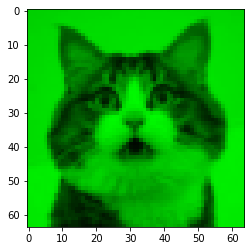

In [35]:
plt.imshow(green)

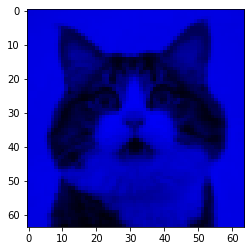

In [36]:
plt.imshow(blue)

In [40]:
print(red[:,:,0])
print(green[:,0,:])
print(blue[:,:,0])

[[0.81545721 0.81176471 0.80784314 ... 0.83529412 0.83226103 0.82745098]
 [0.81960784 0.8169424  0.81960784 ... 0.83921569 0.83655025 0.83137255]
 [0.81960784 0.82745098 0.82745098 ... 0.84313725 0.84313725 0.83529412]
 ...
 [0.92156863 0.92900893 0.92941176 ... 0.92941176 0.9256082  0.92941176]
 [0.91106005 0.92156863 0.92638322 ... 0.93599877 0.9254902  0.91890319]
 [0.90677083 0.91764706 0.91764706 ... 0.93333333 0.92637868 0.91372549]]
[[0.         0.81176471 0.        ]
 [0.         0.81176471 0.        ]
 [0.         0.81176471 0.        ]
 [0.         0.81960784 0.        ]
 [0.         0.81960784 0.        ]
 [0.         0.82352941 0.        ]
 [0.         0.83137255 0.        ]
 [0.         0.83529412 0.        ]
 [0.         0.83820466 0.        ]
 [0.         0.83820466 0.        ]
 [0.         0.83921569 0.        ]
 [0.         0.84313725 0.        ]
 [0.         0.84313725 0.        ]
 [0.         0.84313725 0.        ]
 [0.         0.84313725 0.        ]
 [0.         0.8